# 1.Import necessary packages

In [110]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2.Load the file

In [111]:
mydata = pd.read_csv('Inc_Exp_Data.csv')

# 3.Analyze the data

In [112]:
mydata.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [113]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Mthly_HH_Income             50 non-null int64
Mthly_HH_Expense            50 non-null int64
No_of_Fly_Members           50 non-null int64
Emi_or_Rent_Amt             50 non-null int64
Annual_HH_Income            50 non-null int64
Highest_Qualified_Member    50 non-null object
No_of_Earning_Members       50 non-null int64
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [114]:
mydata.describe(include="all")

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50,50.000000
unique,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,Graduate,NaN
freq,NaN,NaN,NaN,NaN,NaN,19,NaN
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,NaN,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,NaN,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,NaN,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,NaN,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,NaN,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,NaN,2.000000


# 4.What is the Mean Expense of a Household?

In [115]:
print('Mean Expense of a Household:',mydata['Mthly_HH_Expense'].mean())

Mean Expense of a Household: 18818.0


# 5.What is the Median Household Expense?

In [116]:
print('Median Expense of a Household:',mydata['Mthly_HH_Expense'].median())

Median Expense of a Household: 15500.0


# 6.What is the Monthly Expense for most of the Households?

In [117]:
print('Monthly Expense for most of the Households:',mydata['Mthly_HH_Expense'].mode())

Monthly Expense for most of the Households: 0    25000
dtype: int64


In [118]:
temp=pd.crosstab(index=mydata['Mthly_HH_Expense'],columns='count')
temp.reset_index(inplace=True)


temp1=mydata.Mthly_HH_Expense.value_counts().max()

temp['count']==mydata.Mthly_HH_Expense.value_counts().max()

temp[temp['count']==mydata.Mthly_HH_Expense.value_counts().max()]



col_0,Mthly_HH_Expense,count
18,25000,8


# 7.Plot the Histogram to count the Highest qualified member

In [119]:
mydata['Highest_Qualified_Member'].value_counts()

Graduate          19
Under-Graduate    10
Professional      10
Post-Graduate      6
Illiterate         5
Name: Highest_Qualified_Member, dtype: int64

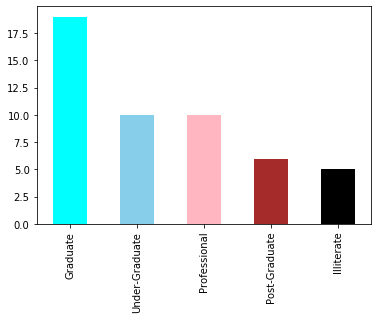

In [124]:
mydata['Highest_Qualified_Member'].value_counts().plot(kind='bar',color=['cyan','skyblue','lightpink','brown','black'])

# 8.Calculate IQR(difference between 75% and 25% quartile)

In [121]:
mydata.quantile(q=0.75)

Mthly_HH_Income           50375.0
Mthly_HH_Expense          25000.0
No_of_Fly_Members             5.0
Emi_or_Rent_Amt            3500.0
Annual_HH_Income         594720.0
No_of_Earning_Members         2.0
Name: 0.75, dtype: float64

In [122]:
mydata.quantile(q=0.25)

Mthly_HH_Income           23550.0
Mthly_HH_Expense          10000.0
No_of_Fly_Members             3.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         258750.0
No_of_Earning_Members         1.0
Name: 0.25, dtype: float64

In [123]:
IQR=mydata.quantile(q=0.75)-mydata.quantile(q=0.25)
IQR

Mthly_HH_Income           26825.0
Mthly_HH_Expense          15000.0
No_of_Fly_Members             2.0
Emi_or_Rent_Amt            3500.0
Annual_HH_Income         335970.0
No_of_Earning_Members         1.0
dtype: float64

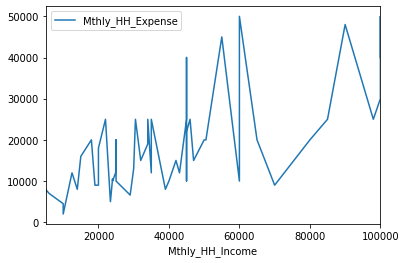

In [127]:
mydata.plot(x="Mthly_HH_Income", y="Mthly_HH_Expense")
IQR = mydata["Mthly_HH_Income"].quantile(0.75) - mydata["Mthly_HH_Expense"].quantile(0.25) 

# 9.Calculate Standard Deviation for first 4 columns.

In [138]:
mydata.iloc[:,0:4].std().to_frame().transpose()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt
0,26097.908979,12090.216824,1.517382,6241.434948


# 10.Calculate Variance for first 3 columns.

In [145]:
mydata.iloc[:,0:3].var().to_frame().transpose()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members
0,6.811009e+08,1.461733e+08,2.302449


# 11.Calculate the count of Highest qualified member.

In [146]:
mydata['Highest_Qualified_Member'].value_counts().to_frame()

,Highest_Qualified_Member
Graduate,19
Under-Graduate,10
Professional,10
Post-Graduate,6
Illiterate,5


# 12.Plot the Histogram to count the No_of_Earning_Members

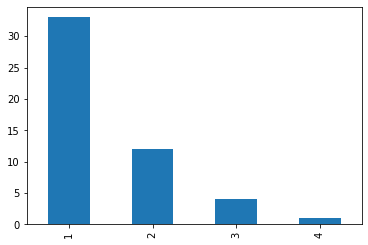

In [151]:
mydata['No_of_Earning_Members'].value_counts().plot(kind='bar')

# 13.Suppose you have option to invest in Stock A or Stock B. The stocks • have different expected returns and standard deviations. The expected return of Stock A is 15% and Stock B is 10%. Standard Deviation of the returns of these stocks is 10% and 5% respectively.

Which is better investment?

In [155]:
stockA= 15/10
stockB= 10/5

In [158]:
if (stockA>stockB):
    print('better investment: stockA')
else:
    print('better investment: stockB')

better investment: stockB
